![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 05 | Cluster Analysis with k-Means

## Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

## [ ] Load the Data

- Simply execute the following lines of code to load the data.
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [1]:
import seaborn as sns #!
import pandas as pd

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 10)

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'ins_losses']]
df_crashes

,alcohol,ins_losses
abbrev,,
AL,5.640,145.08
AK,4.525,133.93
...,...,...
WI,4.554,106.62
WY,5.568,122.04


## `KMeans()` Model in Python

### Fit the Model

In [2]:
from sklearn.cluster import KMeans

In [3]:
model_km = KMeans (n_clusters=3)

In [4]:
model_km.fit(X=df_crashes)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [5]:
model_km.predict(X=df_crashes)

array([1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2])

### Create a New DataFrame for the Predictions

In [7]:
df_pred= df_crashes.copy()

In [8]:
df_pred['pred_km'] = model_km.predict(X=df_crashes)

In [9]:
df_pred

,alcohol,ins_losses,pred_km
abbrev,,,
AL,5.640,145.08,1
AK,4.525,133.93,1
...,...,...,...
WI,4.554,106.62,2
WY,5.568,122.04,2


### Visualize the Model

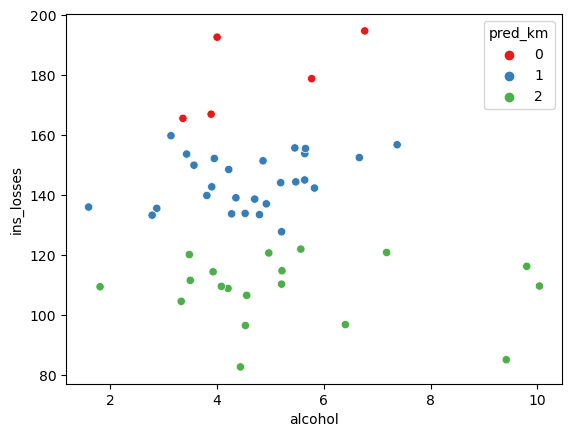

In [10]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, palette='Set1',  hue='pred_km');

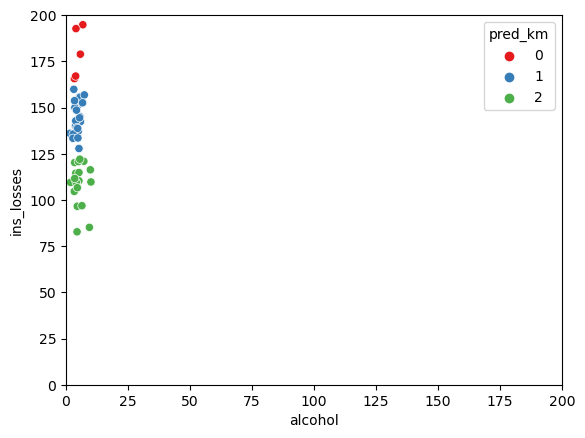

In [11]:
import matplotlib.pyplot as plt

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km',palette='Set1', data=df_pred)
plt.xlim(0, 200)
plt.ylim(0, 200);


### [ ] Model Interpretation

In [12]:
model_km.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['alcohol', 'ins_losses'], dtype=object),
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 0.03038298757712419,
 '_algorithm': 'lloyd',
 '_n_threads': 4,
 'cluster_centers_': array([[  4.7568    , 179.798     ],
        [  4.58548148, 144.38481481],
        [  5.34915789, 108.51421053]]),
 '_n_features_out': 3,
 'labels_': array([1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1,
        1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
        2, 2, 1, 2, 1, 2, 2]),
 'inertia_': 5256.386019299025,
 'n_iter_': 5}

In [ ]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### The Need for Scaling the Data

- You need to `scale` the data
- Every time the algorithm computes `distances`
- Between `different variables`
- Because it's **not the same to increase 1kg of weight than 1m of height**

## [ ] `MinMaxScaler()` the data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_crashes)
data = scaler.transform(df_crashes)

In [14]:
df_scaled = pd.DataFrame(data, columns=df_crashes.columns, index=df_crashes.index)
df_scaled

,alcohol,ins_losses
abbrev,,
AL,0.479218,0.556369
AK,0.347188,0.456842
...,...,...
WI,0.350622,0.213068
WY,0.470693,0.350710


## [ ] `KMeans()` Model with *Scaled Data*

In [15]:
from sklearn.cluster import KMeans

In [16]:
model_kms = KMeans (n_clusters=3)

In [17]:
model_kms.fit(X=df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [18]:
model_kms.predict(X=df_scaled)

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       0, 0, 1, 0, 1, 0, 0])

### Create a New DataFrame for the Predictions

In [19]:
df_pred['pred_km_scaled'] = model_kms.predict(X=df_scaled)

In [20]:
df_pred

,alcohol,ins_losses,pred_km,pred_km_scaled
abbrev,,,,
AL,5.640,145.08,1,1
AK,4.525,133.93,1,0
...,...,...,...,...
WI,4.554,106.62,2,0
WY,5.568,122.04,2,0


### Visualize the Model

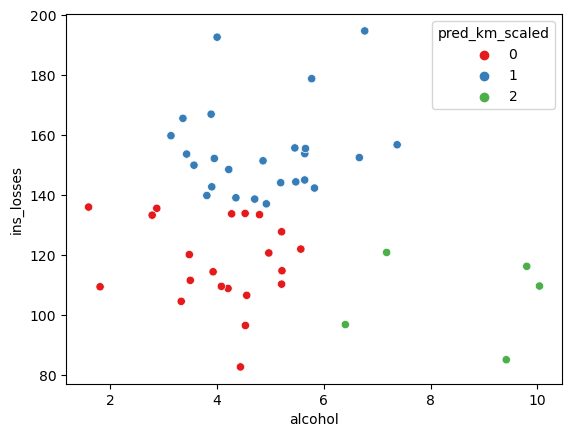

In [21]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred,  hue='pred_km_scaled', palette='Set1');

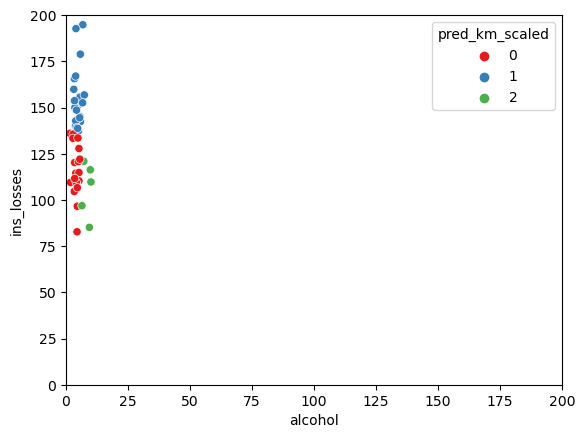

In [22]:
import matplotlib.pyplot as plt

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km_scaled',palette='Set1', data=df_pred)
plt.xlim(0, 200)
plt.ylim(0, 200);

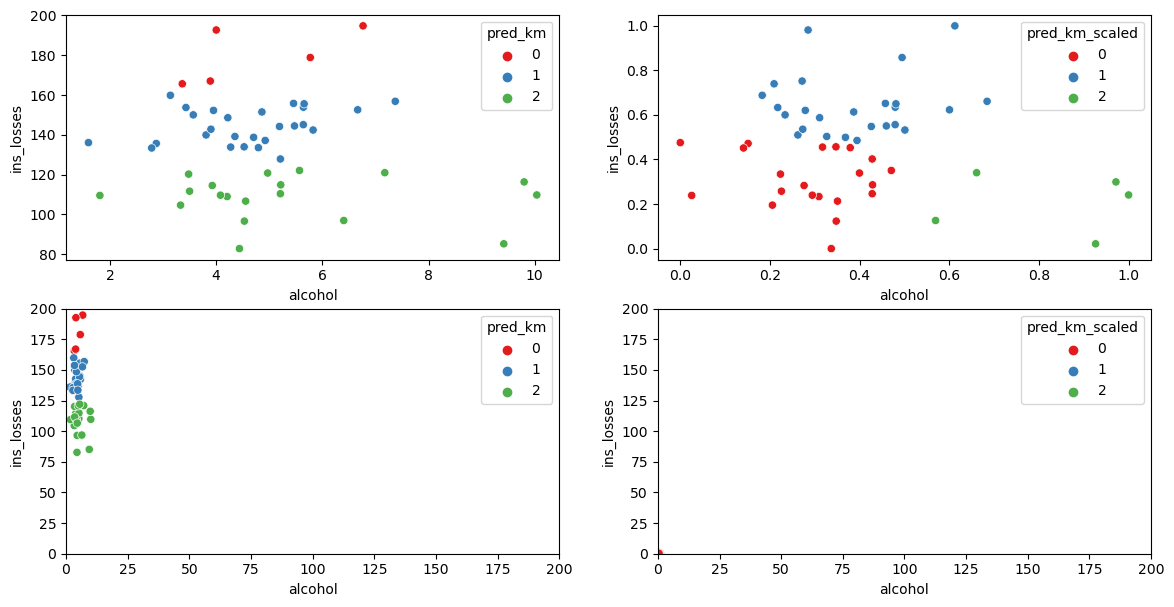

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 7))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_pred.pred_km_scaled,
                data=df_scaled, palette='Set1', ax=ax2);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km',
                data=df_pred, palette='Set1', ax=ax3);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_pred.pred_km_scaled,
                data=df_scaled, palette='Set1', ax=ax4);

ax3.set_xlim(0, 200)
ax3.set_ylim(0, 200)

ax4.set_xlim(0, 200)
ax4.set_ylim(0, 200);

### Model Interpretation

In [24]:
model_kms.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['alcohol', 'ins_losses'], dtype=object),
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 4.464211523389036e-06,
 '_algorithm': 'lloyd',
 '_n_threads': 4,
 'cluster_centers_': array([[0.28981364, 0.30993824],
        [0.38707401, 0.64073195],
        [0.82569568, 0.2056592 ]]),
 '_n_features_out': 3,
 'labels_': array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1,
        0, 0, 1, 0, 1, 0, 0]),
 'inertia_': 1.7805864653388475,
 'n_iter_': 5}

## [ ] Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Agglomerative Clustering

#### Fit the Model

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
model_ac = AgglomerativeClustering(n_clusters=3)

In [29]:
model_ac.fit(X=df_scaled)

AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

In [30]:
model_ac.fit_predict(df_scaled)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1], dtype=int64)

#### Create a New Column for the Predictions

In [31]:
df_pred['pred_ac'] = model_ac.fit_predict(df_scaled)

In [32]:
df_pred

,alcohol,ins_losses,pred_km,pred_km_scaled,pred_ac
abbrev,,,,,
AL,5.640,145.08,1,1,0
AK,4.525,133.93,1,0,0
...,...,...,...,...,...
WI,4.554,106.62,2,0,1
WY,5.568,122.04,2,0,1


#### Visualize the Model

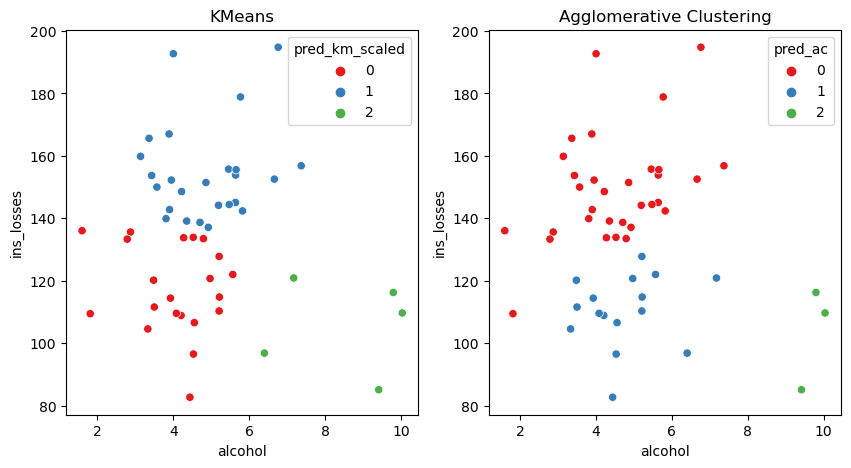

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km_scaled',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_ac',
                data=df_pred, palette='Set1', ax=ax2);

ax1.set_title('KMeans')
ax2.set_title('Agglomerative Clustering');

### Spectral Clustering

#### Fit the Model

In [36]:
from sklearn.cluster import SpectralClustering

In [38]:
model_sp = SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [39]:
model_sp.fit_predict(X=df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0])

#### Create a New Column for the Predictions

In [40]:
df_pred['pred_sp'] = model_sp.fit_predict(X=df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
df_pred

,alcohol,ins_losses,pred_km,pred_km_scaled,pred_ac,pred_sp
abbrev,,,,,,
AL,5.640,145.08,1,1,0,1
AK,4.525,133.93,1,0,0,0
...,...,...,...,...,...,...
WI,4.554,106.62,2,0,1,0
WY,5.568,122.04,2,0,1,0


#### Visualize the Model

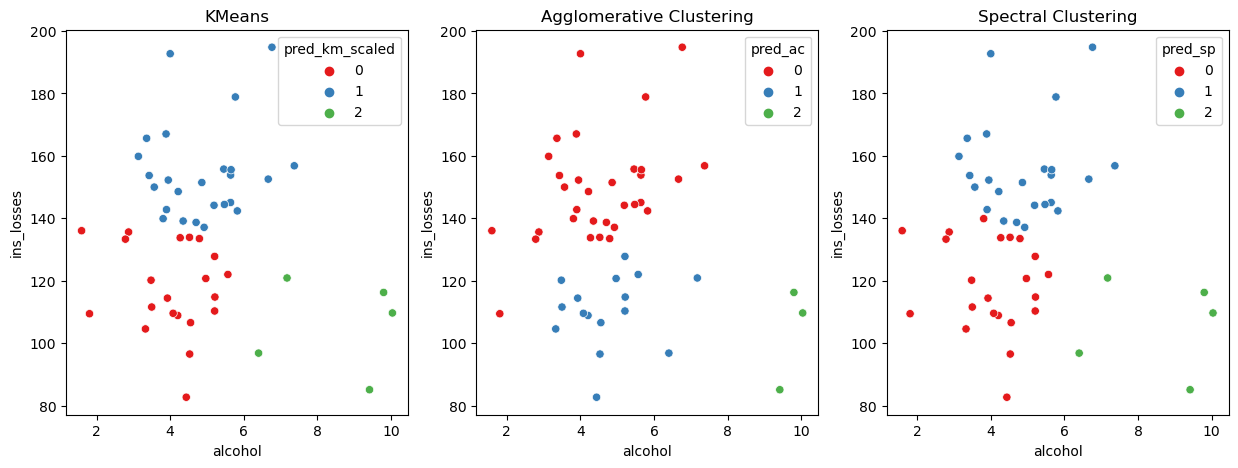

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_km_scaled',
                data=df_pred, palette='Set1', ax=ax1);

ax2.set_title('Agglomerative Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_ac',
                data=df_pred, palette='Set1', ax=ax2);

ax3.set_title('Spectral Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_sp',
                data=df_pred, palette='Set1', ax=ax3);

## [ ] Practical Use Case Conclusion

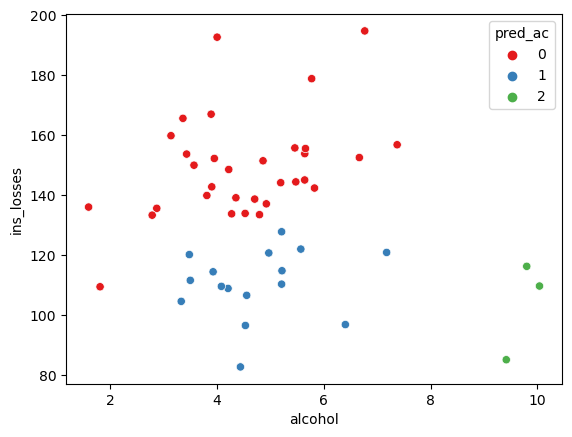

In [44]:
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_ac', data=df_pred, palette='Set1');

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.